<a href="https://colab.research.google.com/github/ajitjadhav10/UMBC/blob/main/DATA%20690%20NLP/DATA_690_NLP_HW_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1. Accuracy of classifier model with Keras

1. Import the 'one_hot', 'pad_sequences', 'Sequential', 'Dense, Flatten',
'Embedding', and 'pandas' libraries.
2. Define the corpus with the following sentences: This is good pizza, I
love Italian pizza, The best pizza, nice pizza, Excellent pizza, I love
pizza, The pizza was alright, disgusting pineapple pizza, not good
pizza, bad pizza, very bad pizza, I had better pizza.
3. Create class labels for each sentence '1' for positive and '0' for
negative.
4. Create a data frame with 'text' as corpus and 'sentiment' as labels.
5. Extract the vocabulary from the corpus and encode it.
6. Pad the document to the maximum length of the longest sentences to
have uniform length.
7. Define the model with Keras with Embedding (None, 5.8) as output
shape, Flatten (None, 40), and Dense (None, 1).
8. Use epochs = 50, optimizer ='adam', loss='binary_crossentropy', and
metrics=['acc'].
9. What are your conclusions about the model?

In [50]:
from numpy import array
import pandas as pd
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
#from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import Embedding

In [51]:
corpus=['This is good pizza', 'I love Italian pizza', 'The best pizza', 'nice pizza','Excellent pizza', 'I love pizza', 'The pizza was alright', 'disgusting pineapple pizza', 'not good pizza', 'bad pizza', 'very bad pizza', 'I had better pizza']

In [52]:
sentiment = array([1,1,1,1,1,1,0,0,0,0,0,0])

In [53]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

all_words = []
for sentence in corpus:
    tokenized_words = word_tokenize(sentence)
    for word in tokenized_words:
        all_words.append(word)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
all_words

['This',
 'is',
 'good',
 'pizza',
 'I',
 'love',
 'Italian',
 'pizza',
 'The',
 'best',
 'pizza',
 'nice',
 'pizza',
 'Excellent',
 'pizza',
 'I',
 'love',
 'pizza',
 'The',
 'pizza',
 'was',
 'alright',
 'disgusting',
 'pineapple',
 'pizza',
 'not',
 'good',
 'pizza',
 'bad',
 'pizza',
 'very',
 'bad',
 'pizza',
 'I',
 'had',
 'better',
 'pizza']

In [55]:
unique_words = set(all_words)
print(len(unique_words))

20


In [56]:
vocab_length=25

In [57]:
embedded_sentences = [one_hot(sent, vocab_length) for sent in corpus]
print(embedded_sentences )

[[16, 22, 21, 21], [7, 22, 23, 21], [19, 9, 21], [3, 21], [4, 21], [7, 22, 21], [19, 21, 13, 11], [24, 14, 21], [12, 21, 21], [8, 21], [3, 8, 21], [7, 24, 7, 21]]


In [58]:
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))

In [59]:
word_count

<function __main__.<lambda>(sentence)>

In [60]:
longest_sentence

'This is good pizza'

In [61]:
length_long_sentence

4

In [62]:
padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')
print(padded_sentences)

[[16 22 21 21]
 [ 7 22 23 21]
 [19  9 21  0]
 [ 3 21  0  0]
 [ 4 21  0  0]
 [ 7 22 21  0]
 [19 21 13 11]
 [24 14 21  0]
 [12 21 21  0]
 [ 8 21  0  0]
 [ 3  8 21  0]
 [ 7 24  7 21]]


In [63]:
model = Sequential()
model.add(Embedding(vocab_length,10, input_length=length_long_sentence))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [64]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 10)             250       
                                                                 
 flatten_1 (Flatten)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
model.fit(padded_sentences, sentiment, epochs=50, verbose=1)

Epoch 1/50
1/1 [==============================] - 1s 531ms/step - loss: 0.6934 - acc: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6917 - acc: 0.5833
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6899 - acc: 0.6667
Epoch 4/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6882 - acc: 0.6667
Epoch 5/50
1/1 [==============================] - 0s 7ms/step - loss: 0.6865 - acc: 0.6667
Epoch 6/50
1/1 [==============================] - 0s 7ms/step - loss: 0.6847 - acc: 0.6667
Epoch 7/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6830 - acc: 0.7500
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6812 - acc: 0.7500
Epoch 9/50
1/1 [==============================] - 0s 7ms/step - loss: 0.6795 - acc: 0.8333
Epoch 10/50
1/1 [==============================] - 0s 7ms/step - loss: 0.6778 - acc: 0.8333
Epoch 11/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6760 - acc: 

The model offers high accuracy of over 90%. By changing the number of epochs, we can try and see if the model offers better results.

Exercise 2.

1. Load nltk, pandas, re, numpy, and matplotlb.
2. Use data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-
Airline-Sentiment-/master/Tweets.csv"

3. Take a look at the first five rows.
4. Plot the shares of airlines mentioned in the data.
5. Plot the percentage of positive, negative, and neutral sentiments.
6. In a bar chart, show the number of positive, negative, and neutral
comments by airline.
7. Using Seaborn, show airlines' sentiment confidence.
8. Define the features and labels.
9. Clean the tweets.
10.Vectorize the tweets.
11.Create a train and test (20%) dataset.
12.Import the RandomClassifier model.
13.Define the 'predictions'.
14.Generate the confusion matrix, the classification report, and the
accuracy score.
15.What is your conclusion?

In [66]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [67]:
df=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20690%20NLP/Data%20files/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [68]:
df.shape

(14640, 15)

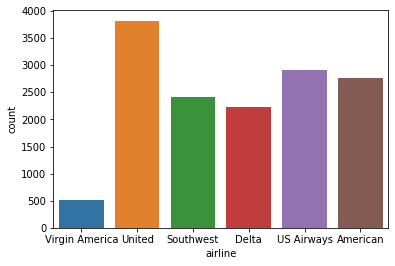

In [69]:
sns.countplot(x=df['airline'])

In [70]:
df_1=df.groupby(['airline_sentiment','airline']).size().reset_index(name='count')
df_1.head()

,airline_sentiment,airline,count
0,negative,American,1960
1,negative,Delta,955
2,negative,Southwest,1186
3,negative,US Airways,2263
4,negative,United,2633


In [71]:
total_count=df_1['count'].sum()
total_count

14640

In [72]:
percentage = []
 
for i in range(df_1.shape[0]):
  pct = (df_1['count'][i] / total_count) * 100
  percentage.append(round(pct, 2))
 
# display percentage
print(percentage)
 
# display data
df_1['Percentage'] = percentage
display(df_1)

[13.39, 6.52, 8.1, 15.46, 17.98, 1.24, 3.16, 4.94, 4.54, 2.6, 4.76, 1.17, 2.3, 3.72, 3.89, 1.84, 3.36, 1.04]


,airline_sentiment,airline,count,Percentage
0,negative,American,1960,13.39
1,negative,Delta,955,6.52
2,negative,Southwest,1186,8.10
3,negative,US Airways,2263,15.46
4,negative,United,2633,17.98
5,negative,Virgin America,181,1.24
6,neutral,American,463,3.16
7,neutral,Delta,723,4.94
8,neutral,Southwest,664,4.54
9,neutral,US Airways,381,2.60


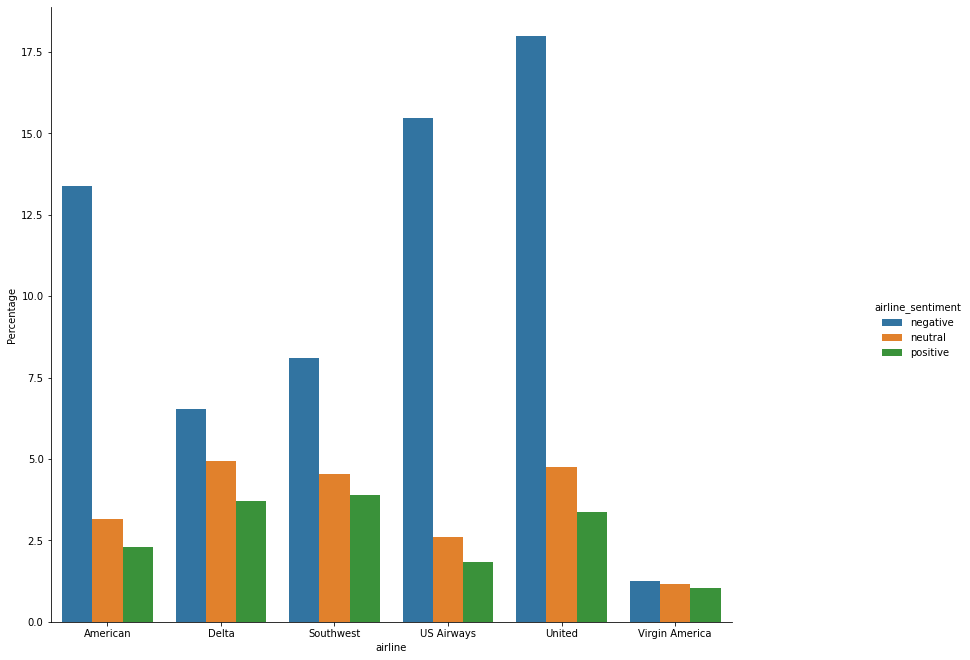

In [73]:
g=sns.catplot(data=df_1, kind="bar", x="airline", y="Percentage", hue="airline_sentiment")
g.figure.set_size_inches(15, 10)

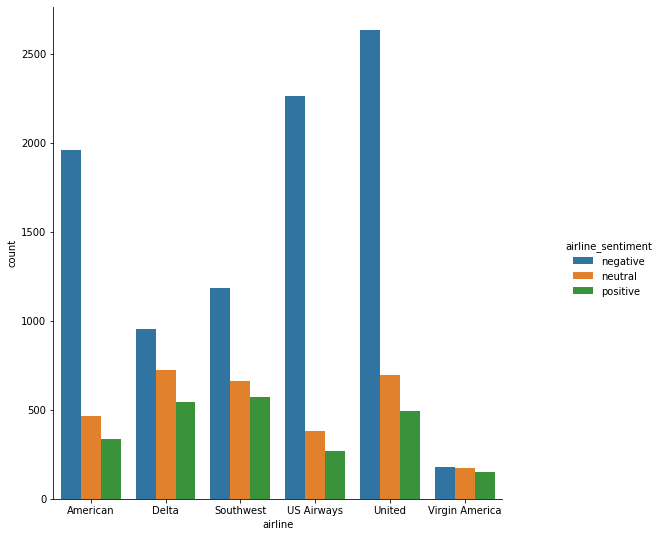

In [74]:
g=sns.catplot(data=df_1, kind="bar", x="airline", y="count", hue="airline_sentiment")
g.figure.set_size_inches(10, 8)

In [75]:
df.head(1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)


In [76]:
df_2=df[['airline_sentiment','airline_sentiment_confidence','airline']]
df_2.head()

,airline_sentiment,airline_sentiment_confidence,airline
0,neutral,1.0000,Virgin America
1,positive,0.3486,Virgin America
2,neutral,0.6837,Virgin America
3,negative,1.0000,Virgin America
4,negative,1.0000,Virgin America


In [77]:
df_3=df_2.groupby(['airline','airline_sentiment']).mean().reset_index()
df_3.head()

,airline,airline_sentiment,airline_sentiment_confidence
0,American,negative,0.944955
1,American,neutral,0.825938
2,American,positive,0.882302
3,Delta,negative,0.902202
4,Delta,neutral,0.829264


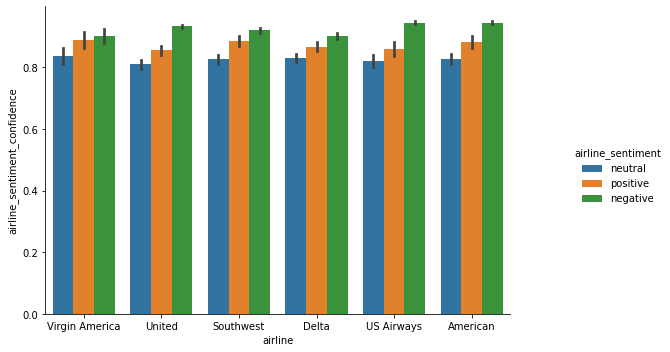

In [78]:
g=sns.catplot(data=df_2, kind="bar", x="airline", y="airline_sentiment_confidence", hue='airline_sentiment')
g.figure.set_size_inches(10, 5)

In [79]:
df_4=df[['text','airline_sentiment']]
df_4.head(3)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral


In [80]:
sentiment_ordering = ['negative', 'neutral', 'positive']

df_4['airline_sentiment'] = df_4['airline_sentiment'].apply(lambda x: sentiment_ordering.index(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
df_4.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,1
1,@VirginAmerica plus you've added commercials t...,2
2,@VirginAmerica I didn't today... Must mean I n...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0


In [82]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
import nltk
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
import emoji
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [84]:
ps = PorterStemmer()

def process_tweet(tweet):
    new_tweet = tweet.lower()
    new_tweet = re.sub(r'@\w+', '', new_tweet) # Remove @s
    new_tweet = re.sub(r'#', '', new_tweet) # Remove hashtags
    new_tweet = re.sub(r':', ' ', emoji.demojize(new_tweet)) # Turn emojis into words
    new_tweet = re.sub(r'http\S+', '',new_tweet) # Remove URLs
    new_tweet = re.sub(r'\$\S+', 'dollar', new_tweet) # Change dollar amounts to dollar
    new_tweet = re.sub(r'[^a-z0-9\s]', '', new_tweet) # Remove punctuation
    new_tweet = re.sub(r'[0-9]+', 'number', new_tweet) # Change number values to number
    new_tweet = new_tweet.split(" ")
    new_tweet = list(map(lambda x: ps.stem(x), new_tweet)) # Stemming the words
    new_tweet = list(map(lambda x: x.strip(), new_tweet)) # Stripping whitespace from the words
    if '' in new_tweet:
        new_tweet.remove('')
    return new_tweet

In [85]:
tweets = df_4['text'].apply(process_tweet)
labels = np.array(df_4['airline_sentiment'])

In [86]:
tweets

0                                           [what, , said]
1        [plu, youv, ad, commerci, to, the, experi, tacki]
2        [i, didnt, today, must, mean, i, need, to, tak...
3        [it, realli, aggress, to, blast, obnoxi, enter...
4         [and, it, a, realli, big, bad, thing, about, it]
                               ...                        
14635    [thank, you, we, got, on, a, differ, flight, t...
14636    [leav, over, number, minut, late, flight, no, ...
14637    [pleas, bring, american, airlin, to, blackberr...
14638    [you, have, my, money, you, chang, my, flight,...
14639    [we, have, number, ppl, so, we, need, number, ...
Name: text, Length: 14640, dtype: object

In [87]:
vocabulary = set()

for tweet in tweets:
    for word in tweet:
        if word not in vocabulary:
            vocabulary.add(word)

vocab_length = len(vocabulary)


max_seq_length = 0

for tweet in tweets:
    if len(tweet) > max_seq_length:
        max_seq_length = len(tweet)

print("Vocab length:", vocab_length)
print("Max sequence length:", max_seq_length)

Vocab length: 11351
Max sequence length: 90


In [88]:
tokenizer = Tokenizer(num_words=vocab_length)
tokenizer.fit_on_texts(tweets)

sequences = tokenizer.texts_to_sequences(tweets)

word_index = tokenizer.word_index

model_inputs = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

In [89]:
model_inputs

array([[ 49,   2, 224, ...,   0,   0,   0],
       [524, 525, 612, ...,   0,   0,   0],
       [  5, 191, 101, ...,   0,   0,   0],
       ...,
       [ 76, 504, 437, ...,   0,   0,   0],
       [  8,  19,  12, ...,   0,   0,   0],
       [ 37,  19,   4, ...,   0,   0,   0]], dtype=int32)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(model_inputs, labels, test_size=0.2, random_state=42)

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [92]:
y_pred = rfc.predict(X_test)

In [93]:
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.6943306010928961


In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [95]:
confusion_matrix(y_test, y_pred)

array([[1785,   84,   20],
       [ 389,  157,   34],
       [ 295,   73,   91]])

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.94      0.82      1889
           1       0.50      0.27      0.35       580
           2       0.63      0.20      0.30       459

    accuracy                           0.69      2928
   macro avg       0.62      0.47      0.49      2928
weighted avg       0.66      0.69      0.65      2928



- The model gives us an accuracy of around 70% which is quite low, the model can be fine tuned to achieve higher accuracy.
- Other classification models can also be employed to check if the accuracy can be further improved